In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec

In [2]:
class gauss:
    def __init__(self,x,mn,sd):
        self.x = x
        self.mn = mn
        self.sd = sd
        
        self.y = 1/np.sqrt(2*np.pi*self.sd**2) * np.exp(-((self.x-self.mn)/self.sd)**2)

class tophat:
    def __init__(self,x,a,b):
        self.x = x
        self.a = a
        self.b = b
        
        self.y = np.zeros(shape=(x.shape))
        self.amp = 1/(self.b-self.a)
        
        for i in range(self.y.shape[0]):
            if self.x[i] >= self.a and self.x[i] <= self.b:
                self.y[i] = self.amp

In [17]:
xmin = 0
xmax = 10
x = np.linspace(xmin,xmax,10000)
th = tophat(x,0.5,8.5)
g0 = gauss(x,4.5,0.5)
g1 = gauss(x,3.5,0.8)

In [18]:
c0='#43abc8'
c1='#f58b4b'
c2='#093145'

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12.0

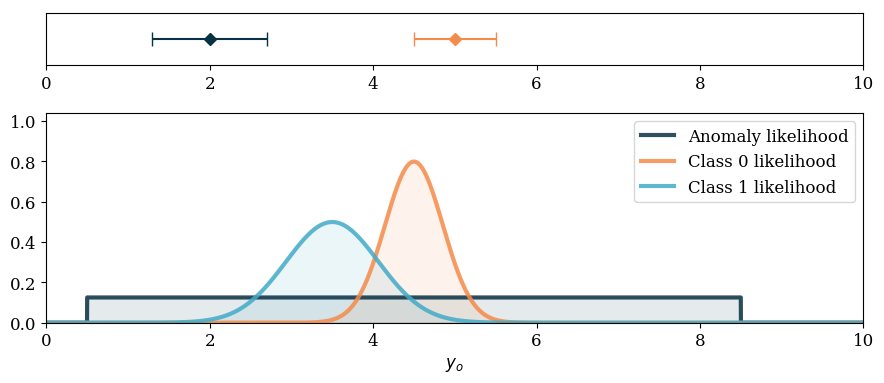

In [50]:
fig = plt.figure(figsize=[9,4],dpi=100)
gs = gridspec.GridSpec(2, 1, height_ratios=[1,4])

ax1 = fig.add_subplot(gs[1])
line1, = ax1.plot(th.x,th.y,color=c2,label='Anomaly likelihood')
line2, = ax1.plot(g0.x,g0.y,color=c1,label='Class 0 likelihood')
line3, = ax1.plot(g1.x,g1.y,color=c0,label='Class 1 likelihood')
for line in [line1,line2,line3]:
    line.set_linewidth(3)
    line.set_alpha(0.85)
    ax1.fill(line.get_data()[0],line.get_data()[1],color=line.get_color(),alpha=0.1)
ax1.set_xlabel(r'$y_o$')
ax1.set_ylim([0,ax1.get_ylim()[1]+0.2])
#ax1.set_yticks(ax1.get_yticks()[::2])
ax1.legend()

ax2 = fig.add_subplot(gs[0], sharex=ax1)
ax2.errorbar([2],[0],xerr=[0.7],fmt='D',color=c2,capsize=5)
ax2.errorbar([5],[0],xerr=[0.5],fmt='D',color=c1,capsize=5)
ax2.set_yticks([])
ax2.set_xlim([xmin,xmax])

fig.tight_layout()
#plt.savefig('../figures/anomaly_schematic.pdf')
#plt.close()
plt.show()